## Setup

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
crypto_df = pd.read_csv('crypto_data.csv')

In [3]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
filtered_crypto_df = crypto_df.loc[crypto_df['IsTrading'] == True]

In [5]:
filtered_crypto_df.drop(['IsTrading', 'CoinName', 'Unnamed: 0'], axis = 1, inplace = True)

C:\Users\bmxng\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
filtered_crypto_df.dropna(inplace = True)

<ipython-input-6-68cb9169c7de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_crypto_df.dropna(inplace = True)


In [90]:
filtered_crypto_df.loc[filtered_crypto_df['TotalCoinsMined'] > 0]

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [91]:
filtered_crypto_df['Algorithm'].nunique()

80

In [92]:
algorithm_dummies = pd.get_dummies(filtered_crypto_df['Algorithm'])

In [93]:
algorithm_dummies = algorithm_dummies.iloc[: , :-1]

In [94]:
algorithm_dummies

,1GB AES Pattern Search,536,Argon2,Argon2d,BLAKE256,Blake,Blake2S,Blake2b,C11,Cloverhash,...,VBFT,VeChainThor Authority,X11,X11GOST,X13,X14,X15,X16R,XEVAN,Zhash
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
prooftype_dummies = pd.get_dummies(filtered_crypto_df['ProofType'])

In [96]:
prooftype_dummies = prooftype_dummies.iloc[: , :-1]

In [97]:
numerical_df = filtered_crypto_df[['TotalCoinsMined', 'TotalCoinSupply']]

In [98]:
final_df = pd.concat([numerical_df, algorithm_dummies, prooftype_dummies], axis=1, join='inner')

In [99]:
final_df

,TotalCoinsMined,TotalCoinSupply,1GB AES Pattern Search,536,Argon2,Argon2d,BLAKE256,Blake,Blake2S,Blake2b,...,PoW and PoS,PoW/PoS,PoW/PoS,PoW/PoW,PoW/nPoS,Pos,Proof of Authority,Proof of Trust,TPoS,Zero-Knowledge Proof
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.000000e+00,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Scaling the data

In [100]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_df)

In [101]:
scaled_data

array([[-0.10282804, -0.03823841, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.07661326, -0.03823825, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.10282804, -0.03823841, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       ...,
       [-0.0784756 , -0.03823801, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.10264677, -0.0382384 , -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.10282485, -0.03823841, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596]])

## Dimensionality Reduction

### PCA

In [102]:
pca = PCA(n_components=.9)

In [103]:
crypto_pca = pca.fit_transform(scaled_data)

In [104]:
crypto_pca.shape

(685, 82)

Went from 107 columns/features to 82.

### t-SNE

In [105]:
tsne = TSNE(perplexity=50)

# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_pca)

In [106]:
tsne_features.shape

(685, 2)

In [107]:
tsne_features

array([[-12.032293  ,  -7.943985  ],
       [-14.383798  , -11.309087  ],
       [  2.596198  ,  26.397015  ],
       ...,
       [ 19.937654  ,   0.05152535],
       [ 15.525628  ,  -6.875409  ],
       [ -2.7075512 ,   7.60957   ]], dtype=float32)

## Visualizing the reduced dataset

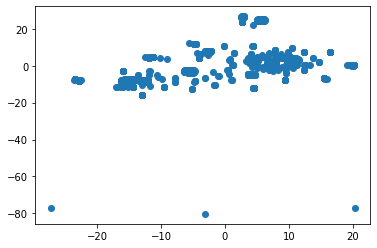

In [108]:
# Visualize the clusters with color
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

## k-Means

In [109]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

C:\Users\bmxng\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


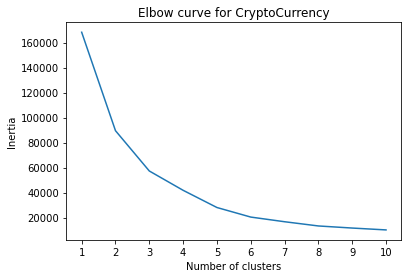

In [110]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for CryptoCurrency')
plt.show()

In [111]:
inertia

[168212.734375,
 89448.2265625,
 57217.34765625,
 41763.52734375,
 27999.955078125,
 20351.427734375,
 16622.10546875,
 13243.4677734375,
 11569.919921875,
 10076.984375]

In [112]:
#initializing k-Means model with k = 3
km = KMeans(n_clusters=3, random_state=0)
km.fit(tsne_features)

KMeans(n_clusters=3, random_state=0)

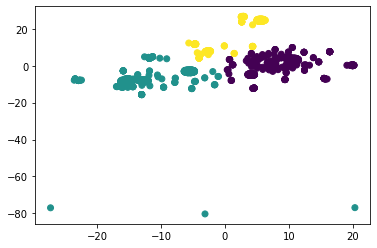

In [113]:
plt.scatter(tsne_features[:,0], tsne_features[:,1],  c= km.labels_)
plt.show()

In [114]:
km.labels_

array([1, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 2, 1, 1,
       2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       2, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2,
       0, 2, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2,
       1, 2, 0, 2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1,
       1, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1,
       1, 0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2, 0, 2, 1, 0, 2, 1, 1,
       0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 1, 2, 1, 0, 1, 1, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 2, 2, 1, 1,
       0, 1, 0, 1, 2, 2, 0, 0, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1,
       0, 2, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1,

## Findings

With our k-means model, we see that CryptoCurrencies can be clustered and that there are predicted 3 clusters, as shown in the scatter plot.